<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    797 non-null    datetime64[ns]
 1   Product Name            797 non-null    object        
 2   Segment                 797 non-null    object        
 3   Color                   797 non-null    object        
 4   Pattern                 797 non-null    object        
 5   Production Quantity     797 non-null    int64         
 6   Sales Quantity          168 non-null    float64       
 7   Inventory Quantity      667 non-null    float64       
 8   Price                   797 non-null    int64         
 9   Revenue                 168 non-null    float64       
 10  Month                   797 non-null    int64         
 11  Season                  797 non-null    object        
 12  Inventory_Turnover      38 non-null     float64   

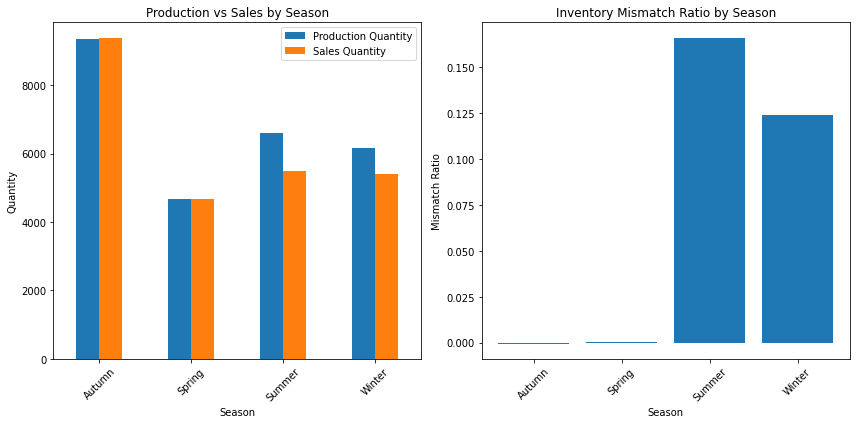


Most Trend-Sensitive Products:
Product Name
Shorts           664.452845
Shorts (Kids)    663.404854
Joggers          661.879647
Track Suit       497.681541
Sweat Shirt      494.256597
Name: Sales Quantity, dtype: float64


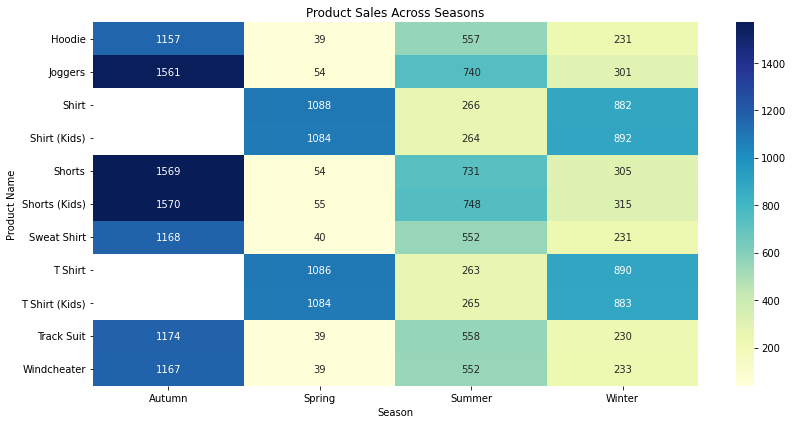


Top Colors by Season:
                                         Color  Season  Sales Quantity
371                                      Khaki  Autumn           516.0
302                   Gray, Black, Blue, Green  Autumn           334.0
584  Olive Green, Khaki, Navy, Charcoal, Black  Autumn           327.0
413                   Light Gray, Black, Khaki  Spring           224.0
590              Olive Green, Navy Blue, Beige  Spring           219.0
585                    Olive Green, Light Gray  Spring           218.0
32                    Black, Blue, Navy, Green  Summer           221.0
548                          Navy, Gray, Black  Summer           221.0
319                         Gray, Khaki, Black  Summer           220.0
462                                  Navy Blue  Winter           432.0
507                     Navy Blue, Gray, White  Winter           236.0
450                              Maroon, White  Winter           234.0

Top Patterns by Season:
                     Pattern 

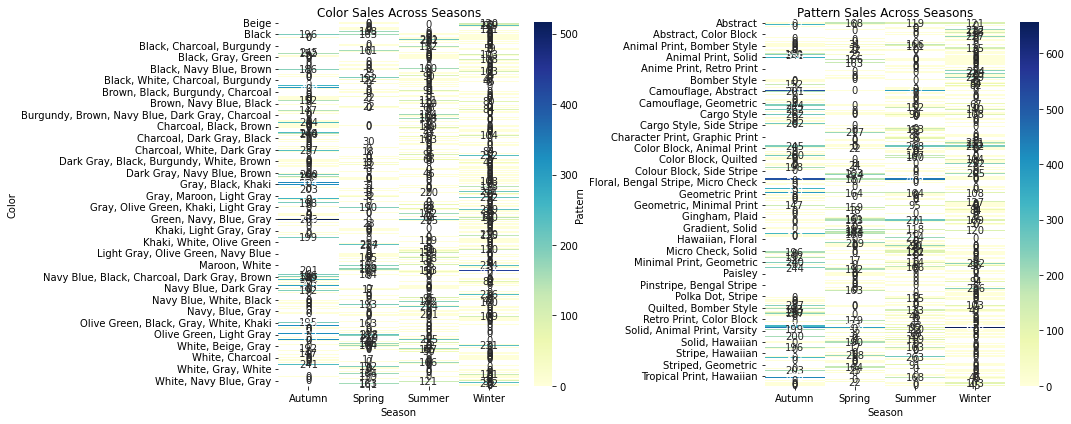


Seasonal Sales Quantity Predictions:
Season
Autumn    223.000000
Spring    122.684211
Summer    116.936170
Winter    131.536585
Name: Sales Quantity, dtype: float64


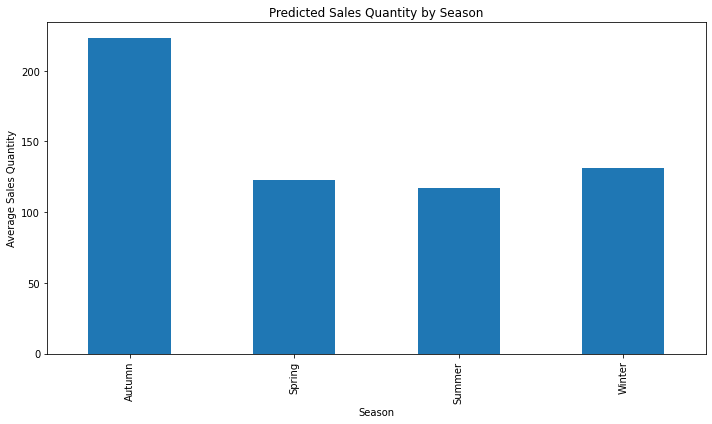

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df1 = pd.read_excel('KhalsaGarments2023to2024.xlsx')
df2 = pd.read_excel('KhalsaGarments2024to2025.xlsx')

# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

# Data Preprocessing
def preprocess_data(df):
    # Ensure numeric columns are converted correctly
    numeric_columns = ['Production Quantity', 'Sales Quantity', 'Inventory Quantity', 'Price', 'Revenue']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract season and month
    df['Month'] = df['Date'].dt.month
    df['Season'] = df['Date'].dt.month.map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',  # Winter months
        3: 'Spring', 4: 'Spring', 5: 'Spring',    # Spring months
        6: 'Summer', 7: 'Summer', 8: 'Summer',    # Summer months
        9: 'Autumn', 10: 'Autumn', 11: 'Autumn'   # Autumn months
    })
    
    # Calculate key metrics
    df['Inventory_Turnover'] = df['Sales Quantity'] / df['Inventory Quantity']
    df['Production_Sales_Ratio'] = df['Production Quantity'] / df['Sales Quantity']
    
    return df

# Preprocess the data
df = preprocess_data(df)

# 1. Seasonal Production Analysis
def seasonal_production_analysis(df):
    # Aggregate production and sales by season
    seasonal_summary = df.groupby('Season').agg({
        'Production Quantity': 'sum',
        'Sales Quantity': 'sum',
        'Inventory Quantity': 'sum',
        'Revenue': 'sum'
    }).reset_index()
    
    # Calculate inventory mismatch
    seasonal_summary['Inventory_Mismatch_Ratio'] = (seasonal_summary['Production Quantity'] - seasonal_summary['Sales Quantity']) / seasonal_summary['Production Quantity']
    
    print("Seasonal Production Summary:")
    print(seasonal_summary)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    
    # Production vs Sales by Season
    plt.subplot(1, 2, 1)
    seasonal_summary.plot(x='Season', y=['Production Quantity', 'Sales Quantity'], 
                           kind='bar', ax=plt.gca())
    plt.title('Production vs Sales by Season')
    plt.xlabel('Season')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    
    # Inventory Mismatch Ratio
    plt.subplot(1, 2, 2)
    plt.bar(seasonal_summary['Season'], seasonal_summary['Inventory_Mismatch_Ratio'])
    plt.title('Inventory Mismatch Ratio by Season')
    plt.xlabel('Season')
    plt.ylabel('Mismatch Ratio')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return seasonal_summary

# 2. Product Trend Analysis
def product_trend_analysis(df):
    # Analyze trend sensitivity by product
    product_trends = df.groupby(['Product Name', 'Season']).agg({
        'Sales Quantity': 'sum',
        'Revenue': 'sum',
        'Inventory Quantity': 'mean'
    }).reset_index()
    
    # Identify most trend-sensitive products
    product_trend_volatility = product_trends.groupby('Product Name')['Sales Quantity'].std()
    most_volatile_products = product_trend_volatility.nlargest(5)
    
    print("\nMost Trend-Sensitive Products:")
    print(most_volatile_products)
    
    # Visualization of product performance across seasons
    plt.figure(figsize=(12, 6))
    pivot_sales = product_trends.pivot(index='Product Name', columns='Season', values='Sales Quantity')
    sns.heatmap(pivot_sales, annot=True, cmap='YlGnBu', fmt='.0f')
    plt.title('Product Sales Across Seasons')
    plt.tight_layout()
    plt.show()
    
    return product_trends

# 3. Color and Pattern Trend Analysis
def color_pattern_trend_analysis(df):
    # Analyze color and pattern performance by season
    color_trends = df.groupby(['Color', 'Season'])['Sales Quantity'].sum().reset_index()
    pattern_trends = df.groupby(['Pattern', 'Season'])['Sales Quantity'].sum().reset_index()
    
    print("\nTop Colors by Season:")
    print(color_trends.sort_values(['Season', 'Sales Quantity'], ascending=[True, False]).groupby('Season').head(3))
    
    print("\nTop Patterns by Season:")
    print(pattern_trends.sort_values(['Season', 'Sales Quantity'], ascending=[True, False]).groupby('Season').head(3))
    
    # Visualization
    plt.figure(figsize=(15, 6))
    
    # Color Trends
    plt.subplot(1, 2, 1)
    color_pivot = color_trends.pivot(index='Color', columns='Season', values='Sales Quantity')
    sns.heatmap(color_pivot, annot=True, cmap='YlGnBu', fmt='.0f')
    plt.title('Color Sales Across Seasons')
    
    # Pattern Trends
    plt.subplot(1, 2, 2)
    pattern_pivot = pattern_trends.pivot(index='Pattern', columns='Season', values='Sales Quantity')
    sns.heatmap(pattern_pivot, annot=True, cmap='YlGnBu', fmt='.0f')
    plt.title('Pattern Sales Across Seasons')
    
    plt.tight_layout()
    plt.show()
    
    return color_trends, pattern_trends

# 4. Predictive Inventory Optimization
def predictive_inventory_optimization(df):
    # Create features for prediction
    df['Month_sin'] = np.sin(df['Month'] * (2 * np.pi / 12))
    df['Month_cos'] = np.cos(df['Month'] * (2 * np.pi / 12))
    
    # Simple predictive model using average seasonal performance
    seasonal_avg = df.groupby('Season')['Sales Quantity'].mean()
    
    print("\nSeasonal Sales Quantity Predictions:")
    print(seasonal_avg)
    
    # Visualization of seasonal predictions
    plt.figure(figsize=(10, 6))
    seasonal_avg.plot(kind='bar')
    plt.title('Predicted Sales Quantity by Season')
    plt.xlabel('Season')
    plt.ylabel('Average Sales Quantity')
    plt.tight_layout()
    plt.show()
    
    return seasonal_avg

# Debugging: Print column info
print(df.info())

# Run all analyses
seasonal_summary = seasonal_production_analysis(df)
product_trends = product_trend_analysis(df)
color_trends, pattern_trends = color_pattern_trend_analysis(df)
seasonal_predictions = predictive_inventory_optimization(df)

In [5]:
df_2023_2024 = pd.read_excel('KhalsaGarments2023to2024.xlsx')
df_2024_2025 = pd.read_excel('KhalsaGarments2024to2025.xlsx')
for df in [df_2023_2024, df_2024_2025]:
    for col in ['Production Quantity', 'Sales Quantity', 'Inventory Quantity', 'Revenue']:
        df[col].replace('-', 0, inplace=True)
        df[col] = df[col].astype(float)
    df['Date'] = pd.to_datetime(df['Date'])
merged_df = pd.concat([df_2023_2024, df_2024_2025])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 0 to 392
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 797 non-null    datetime64[ns]
 1   Product Name         797 non-null    object        
 2   Segment              797 non-null    object        
 3   Color                797 non-null    object        
 4   Pattern              797 non-null    object        
 5   Production Quantity  797 non-null    float64       
 6   Sales Quantity       797 non-null    float64       
 7   Inventory Quantity   797 non-null    float64       
 8   Price                797 non-null    int64         
 9   Revenue              797 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 68.5+ KB


In [8]:
merged_df['Product Name'].unique()

array(['Track Suit', 'Hoodie', 'Sweat Shirt', 'Windcheater', 'T Shirt',
       'Shirt', 'T Shirt (Kids)', 'Shirt (Kids)', 'Joggers', 'Shorts',
       'Shorts (Kids)'], dtype=object)

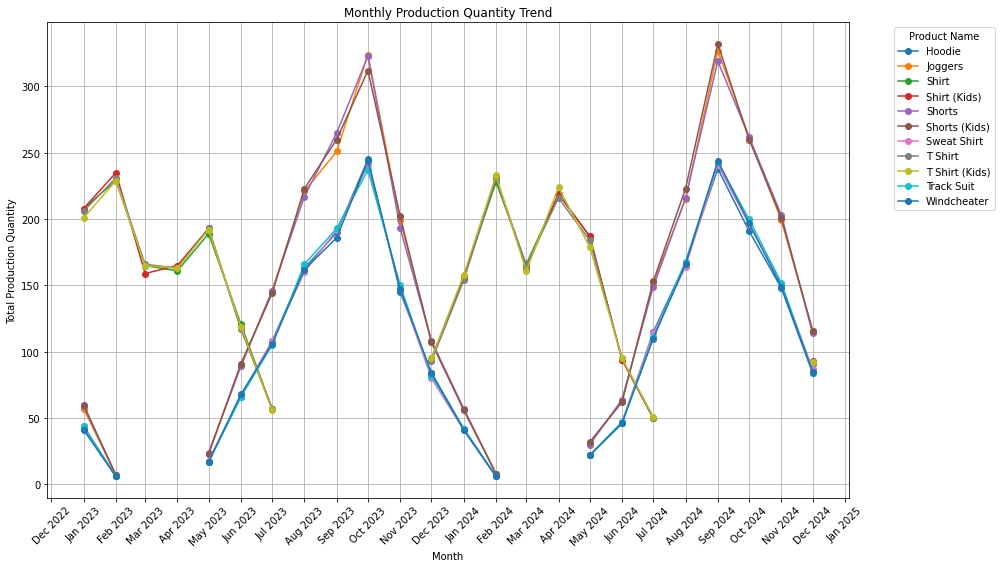

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Create a YearMonth column as a timestamp representing the first day of each month
merged_df["YearMonth"] = merged_df["Date"].dt.to_period("M").dt.to_timestamp()
# products = ["Track Suit", "Hoodie", "Sweat Shirt", "Windcheater"]
products = merged_df['Product Name'].unique()
# Filter the data for these products
filtered_df = merged_df[merged_df["Product Name"].isin(products)]
# Create a pivot table where each row is a month and each column is a product.
# The values are the sum of the Production Quantity for that month.
pivot_df = filtered_df.pivot_table(
    index="YearMonth",
    columns="Product Name",
    values="Production Quantity",
    aggfunc="sum",
)
# Ensure all months between the first and last month are present
all_months = pd.date_range(
    start=pivot_df.index.min(), end=pivot_df.index.max(), freq="MS"
)
pivot_df = pivot_df.reindex(all_months, fill_value=0)

# Plot the monthly trend for each product
fig, ax = plt.subplots(figsize=(14, 8))
for product in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[product], marker="o", label=product)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)
plt.title("Monthly Production Quantity Trend")
plt.xlabel("Month")
plt.ylabel("Total Production Quantity")
plt.legend(title="Product Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test
result = adfuller(merged_df_agg["Sales Quantity"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# If p-value > 0.05, data is not stationary and needs differencing
# diff_series = merged_df_agg['Sales Quantity'].diff().dropna()
# result = adfuller(diff_series)
"""
ADF statistic and p-value indicate that your time series is already stationary. 
Since the p-value (0.0019) is less than 0.05, we can reject the null hypothesis of a unit root, meaning your data doesn't need differencing.
This suggests that d parameter should be 0, not 1 as in ARIMA model.'
"""

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create ACF and PACF plots for the original series (since it's already stationary)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(merged_df_agg["Sales Quantity"], ax=ax1, lags=30)
plot_pacf(merged_df_agg["Sales Quantity"], ax=ax2, lags=30)
plt.tight_layout()
plt.show()

In [ ]:
from itertools import product
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Define p, d, q ranges to test
p_range = range(0, 4)  # 0, 1, 2, 3
d_range = [0]  # Already stationary
q_range = range(0, 4)  # 0, 1, 2, 3

# Create a list to store AIC values
results = []

# Test all combinations of p, d, q
for p, d, q in product(p_range, d_range, q_range):
    try:
        model = ARIMA(merged_df_agg["Sales Quantity"], order=(p, d, q))
        model_fit = model.fit()
        results.append([p, d, q, model_fit.aic, model_fit.bic])
        print(f"ARIMA({p},{d},{q}) - AIC:{model_fit.aic}, BIC:{model_fit.bic}")
    except:
        continue

# Convert results to DataFrame and find the best model
results_df = pd.DataFrame(results, columns=["p", "d", "q", "AIC", "BIC"])
best_aic = results_df.loc[results_df["AIC"].idxmin()]
best_bic = results_df.loc[results_df["BIC"].idxmin()]

print(
    f"Best AIC model: ARIMA({int(best_aic[0])},{int(best_aic[1])},{int(best_aic[2])}) - AIC:{best_aic[3]}"
)
print(
    f"Best BIC model: ARIMA({int(best_bic[0])},{int(best_bic[1])},{int(best_bic[2])}) - BIC:{best_bic[4]}"
)

In [ ]:
# Fit both AIC and BIC models
model_aic = ARIMA(merged_df_agg["Sales Quantity"], order=(3, 0, 2))
model_aic_fit = model_aic.fit()
model_bic = ARIMA(merged_df_agg["Sales Quantity"], order=(3, 0, 0))
model_bic_fit = model_bic.fit()

# Check residuals for both models
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

# AIC model residuals
model_aic_fit.resid.plot(ax=ax1)
ax1.set_title("ARIMA(3,0,2) Residuals")
model_aic_fit.resid.plot(kind="kde", ax=ax2)
ax2.set_title("ARIMA(3,0,2) Residual Density")

# BIC model residuals
model_bic_fit.resid.plot(ax=ax3)
ax3.set_title("ARIMA(3,0,0) Residuals")
model_bic_fit.resid.plot(kind="kde", ax=ax4)
ax4.set_title("ARIMA(3,0,0) Residual Density")

plt.tight_layout()
plt.show()

# Generate forecasts from both models
forecast_aic = model_aic_fit.forecast(steps=10)
forecast_bic = model_bic_fit.forecast(steps=10)

# Compare forecasts
plt.figure(figsize=(12, 6))
plt.plot(
    merged_df_agg.index[-20:], merged_df_agg["Sales Quantity"][-20:], label="Actual"
)
plt.plot(
    pd.date_range(start=merged_df_agg.index[-1], periods=11)[1:],
    forecast_aic,
    label="ARIMA(3,0,2) Forecast",
)
plt.plot(
    pd.date_range(start=merged_df_agg.index[-1], periods=11)[1:],
    forecast_bic,
    label="ARIMA(3,0,0) Forecast",
)
plt.title("Sales Quantity Forecast Comparison")
plt.legend()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test for both models
lb_test_aic = acorr_ljungbox(model_aic_fit.resid, lags=10)
lb_test_bic = acorr_ljungbox(model_bic_fit.resid, lags=10)

print(f'Ljung-Box test p-value (AIC model): {lb_test_aic["lb_pvalue"].values[0]}')
print(f'Ljung-Box test p-value (BIC model): {lb_test_bic["lb_pvalue"].values[0]}')

"""
Both models have p-values greater than 0.05, which means both are capturing the patterns in the data well, 
with no significant autocorrelation left in the residuals.

The ARIMA(3,0,2) model (AIC model) has a considerably higher p-value (0.77) compared to the ARIMA(3,0,0) model (0.28), 
suggesting that the more complex model with both AR and MA components is doing a better job of fitting your data.
"""

In [ ]:
# Forecasting with ARIMA(3,0,2) model

final_model = model_aic_fit

# Generate forecast for the next 10 periods
forecast_steps = 10
forecast = final_model.get_forecast(steps=forecast_steps)
# Extract the forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int(alpha=0.05)  # 95% confidence interval
# Create a date range for the forecast period
last_date = merged_df_agg.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1)[1:]
# Create a DataFrame with the forecast results
forecast_df = pd.DataFrame(
    {
        "Forecast": forecast_mean,
        "Lower CI": forecast_ci.iloc[:, 0],
        "Upper CI": forecast_ci.iloc[:, 1],
    },
    index=forecast_dates,
)

# Display the forecast
print("Sales Quantity Forecast:")
print(forecast_df)

# Visualize the forecast
plt.figure(figsize=(12, 6))
# Plot historical data (last 30 periods)
plt.plot(
    merged_df_agg.index[-30:],
    merged_df_agg["Sales Quantity"][-30:],
    label="Historical",
    color="blue",
)

# Plot forecast
plt.plot(forecast_dates, forecast_mean, color="red", label="Forecast")
plt.fill_between(
    forecast_dates,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="pink",
    alpha=0.3,
    label="95% Confidence Interval",
)

plt.title("Sales Quantity Forecast with ARIMA(3,0,2)")
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## SARIMA

In [ ]:
# Fit a SARIMA model on 'Sales Quantity'
# Example seasonal order: (1, 1, 1, 7) assumes a weekly seasonal cycle for daily data.
sarima_model = SARIMAX(
    merged_df_agg["Sales Quantity"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)
)
sarima_model_fit = sarima_model.fit(disp=False)
print(sarima_model_fit.summary())

# Forecast the next 10 periods
sarima_forecast = sarima_model_fit.forecast(steps=10)
print("SARIMA Forecast:")
print(sarima_forecast)

## Prophet

In [ ]:
# Prepare data for Prophet by resetting the index and renaming columns
df_prophet = merged_df_agg.reset_index()[["Date", "Sales Quantity"]].rename(
    columns={"Date": "ds", "Sales Quantity": "y"}
)

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# Create a dataframe to hold future dates (e.g., forecasting 30 future periods)
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot the forecast
fig1 = prophet_model.plot(forecast)
plt.title("Prophet Forecast of Sales Quantity")
plt.show()

# Optionally, inspect the forecast components (trend, weekly, yearly, etc.)
fig2 = prophet_model.plot_components(forecast)
plt.show()

## Inferential Statistics

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Box Plot for Dispersion Analysis
sns.boxplot(data=merged_df_agg[numeric_cols], ax=axes[0])
axes[0].set_title("Box Plot for Dispersion Analysis")
axes[0].tick_params(axis="x", rotation=45)

# Bar Plot for Standard Deviation
variability = merged_df_agg[numeric_cols].std()
sns.barplot(x=variability.index, y=variability.values, ax=axes[1])
axes[1].set_title("Standard Deviation of Variables")
axes[1].set_ylabel("Standard Deviation")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# 1. ANOVA-style Segment Comparison
sns.boxenplot(x="Segment", y="Revenue", data=merged_df, ax=axes[0])
axes[0].set_title(
    "Revenue Distribution Across Segments\nwith Significance Indicators", fontsize=16
)
axes[0].tick_params(axis="x")

# 2. Confidence Interval Visualization for Key Metrics
metrics = ["Revenue", "Sales Quantity", "Production Quantity"]
confidence_data = []
for metric in metrics:
    data = merged_df[metric]
    mean = data.mean()
    ci = stats.t.interval(alpha=0.95, df=len(data) - 1, loc=mean, scale=stats.sem(data))
    confidence_data.append(
        {"Metric": metric, "Mean": mean, "Lower CI": ci[0], "Upper CI": ci[1]}
    )
confidence_df = pd.DataFrame(confidence_data)
sns.barplot(
    x="Metric",
    y="Mean",
    data=confidence_df,
    yerr=(confidence_df["Mean"] - confidence_df["Lower CI"]),
    capsize=0.1,
    palette="viridis",
    ax=axes[1],
)
axes[1].set_title(
    "Confidence Intervals for Key Metrics\n(95% Confidence Level)", fontsize=16
)
axes[1].tick_params(axis="x")

# 3. Normality Q-Q Plots
metrics = ["Revenue", "Sales Quantity", "Production Quantity"]
for metric in metrics:
    stats.probplot(merged_df[metric], plot=axes[2])
axes[2].set_title("Q-Q Plots for Normality Assessment", fontsize=16)

# 4. Hypothesis Testing Visualization (ANOVA-like)
f_statistic, p_value = stats.f_oneway(
    merged_df[merged_df["Segment"] == merged_df["Segment"].unique()[0]]["Revenue"],
    merged_df[merged_df["Segment"] == merged_df["Segment"].unique()[1]]["Revenue"],
)

# Create bar plot showing means with statistical significance
segment_means = merged_df.groupby("Segment")["Revenue"].mean()
axes[3].bar(segment_means.index, segment_means.values)
axes[3].set_title(f"Segment Revenue Means\nANOVA p-value: {p_value:.4f}", fontsize=16)
axes[3].set_ylabel("Mean Revenue")

# Add significance star if p-value is significant
if p_value < 0.05:
    axes[3].text(
        0.5,
        axes[1, 1].get_ylim()[1],
        "*",
        horizontalalignment="center",
        color="red",
        fontsize=20,
    )

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
# Define a hypothesized mean for the test
hypothesized_value = 50

test_results = {}
print("Hypothesis Testing (One-Sample t-test):")
for col in numeric_cols:
    t_stat, p_val = stats.ttest_1samp(merged_df_agg[col], popmean=hypothesized_value)
    test_results[col] = {
        "mean": merged_df_agg[col].mean(),
        "t_stat": t_stat,
        "p_value": p_val,
    }
    print(
        f"{col}: Mean = {merged_df_agg[col].mean():.2f}, t-stat = {t_stat:.2f}, p-value = {p_val:.3f}"
    )

ci_dict = {}

print("\n95% Confidence Intervals:")
for col in numeric_cols:
    data = merged_df_agg[col]
    n = len(data)
    mean_val = np.mean(data)
    std_err = stats.sem(data)  # Standard Error of the Mean
    ci = stats.t.interval(0.95, n - 1, loc=mean_val, scale=std_err)
    ci_dict[col] = ci
    print(f"{col}: 95% CI = ({ci[0]:.2f}, {ci[1]:.2f})")

means = [merged_df_agg[col].mean() for col in numeric_cols]
# Calculate the error bar lengths (assuming symmetric errors)
errors = [merged_df_agg[col].mean() - ci_dict[col][0] for col in numeric_cols]

plt.figure(figsize=(10, 6))
plt.errorbar(
    numeric_cols,
    means,
    yerr=errors,
    fmt="o",
    capsize=5,
    capthick=2,
    label="Mean with 95% CI",
)
plt.title("Means and 95% Confidence Intervals for Numeric Variables")
plt.ylabel("Value")
plt.xlabel("Variables")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()